https://discourse.pymc.io/t/a-little-change-to-the-sample-code-of-map-however/1026

In [1]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import matplotlib.pylab as plt

import theano.tensor as tt

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


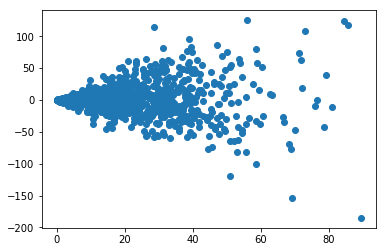

In [2]:
#True parameter values
alpha0, sigma = 1, 1
beta0 = [10, 25]

#Size of dataset and epsilon for sigma
size = 1000
epsilon=1e-5

#Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size)

#Simulate outcome variable
sd = np.abs(alpha0 + beta0[0]*X1 + beta0[1]*X2)+epsilon
Y = np.random.normal(0., sd)

plt.plot(sd, Y, 'o');

In [3]:
with pm.Model() as basic_model:
    #Priors for unknown model parameters
    alpha = pm.Normal('alpha', sd=10)
    beta = pm.Normal('beta', sd=10, shape=2)
    mu = pm.Normal('mu', mu=0, sd=1)

    #Expected value of outcome
    sigma = tt.abs_(alpha + beta[0] * X1 + beta[1] * X2) + epsilon

    #Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [4]:
point = basic_model.test_point

In [5]:
basic_model.logp(point)

array(-3.4485672e+15)

In [6]:
map_est = pm.find_MAP(model=basic_model)
map_est

logp = -3.4486e+15, ||grad|| = 7.5033e+12: 100%|██████████| 11/11 [00:00<00:00, 458.64it/s]


{'alpha': array(0.), 'beta': array([0., 0.]), 'mu': array(0.75032523)}

In [7]:
point['alpha'] = np.array(0.)
point['beta'] = np.asarray([10, 20])

map_est = pm.find_MAP(start=point, model=basic_model)
map_est

logp = -5,992.5, ||grad|| = 1.0888e+05: 100%|██████████| 114/114 [00:00<00:00, 1229.72it/s]


{'alpha': array(-0.06352716),
 'beta': array([10.02893757, 20.04767151]),
 'mu': array(0.07972412)}

In [8]:
basic_model.logp(map_est)

array(-5992.4631578)

In [9]:
point['alpha'] = np.array(alpha0)
point['beta'] = np.asarray(beta0)
point['mu'] = np.asarray(0.)
basic_model.logp(point)

array(-4103.27542403)

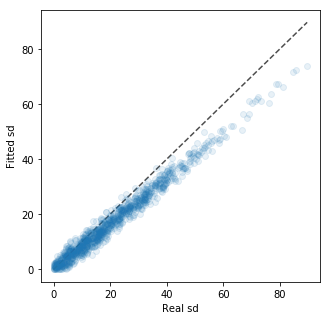

In [10]:
sigma_map = np.abs(map_est['alpha'] +
                   map_est['beta'][0] * X1 +
                   map_est['beta'][1] * X2) + epsilon

_, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_xlabel('Real sd')
ax.set_ylabel('Fitted sd')
ax.plot([0, max(sd)], [0, max(sd)], ls="--", c=".3")
ax.plot(sd, sigma_map, 'o', alpha=.1);

In [13]:
point = basic_model.test_point
point['alpha'] = np.array(0.)
point['beta'] = np.asarray([10., 20.])

with basic_model:
    trace = pm.sample(start=map_est)

pm.traceplot(trace);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, beta, alpha]
 86%|████████▋ | 865/1000 [01:45<00:35,  3.80it/s]


KeyboardInterrupt: 